# Data Dessciption

There is a dataset with 10,48,575 people in the dataset in data.That means there are total 10,48,575 rows and 16 columns.
There are debit and credit cards in cards in columns.There are also columns for transition type,transition response,transition Channel and Amount.

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Data Collection And Cleaning 

In [3]:
p1 = pd.read_csv("D:/Redmi 8 daul/Complete Projects/payment.csv", encoding= 'unicode_escape')

In [4]:
p1.shape

(1048575, 16)

In [5]:
p1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 16 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   TransactionID              1048575 non-null  int64  
 1   TransactionDate            1048575 non-null  object 
 2   TransactionAmount          1048575 non-null  float64
 3   MerchantID                 1048575 non-null  object 
 4   CardholderID               1048575 non-null  object 
 5   TransactionType            1048575 non-null  object 
 6   TransactionCurrency        1048575 non-null  object 
 7   CardType                   1048575 non-null  object 
 8   CountryCode                1048575 non-null  object 
 9   MerchantCategoryCode       1048575 non-null  object 
 10  TransactionResponseCode    1048575 non-null  object 
 11  FraudulentTransactionFlag  1048575 non-null  int64  
 12  TransactionTime            1048575 non-null  object 
 13  CardholderAg

In [6]:
# change data type
p1['TransactionAmount'] = p1['TransactionAmount'].astype('int')

In [7]:
p1.sample(5)

,TransactionID,TransactionDate,TransactionAmount,MerchantID,CardholderID,TransactionType,TransactionCurrency,CardType,CountryCode,MerchantCategoryCode,TransactionResponseCode,FraudulentTransactionFlag,TransactionTime,CardholderAge,CardholderGender,TransactionChannel
63330,60,09-08-2023,96,MID00177,CID00286,Purchase,GBP,Debit,UK,Retail,Approved,0,Evening,31,Male,In-store
582080,107,12-06-2023,160,MID00070,CID00128,Refund,USD,Credit,CA,Dining,Approved,0,Evening,40,Female,Online
570191,28,11-05-2023,62,MID00065,CID00163,Purchase,USD,Debit,UK,Retail,Approved,0,Morning,38,Male,In-store
481938,20,05-06-2023,60,MID00128,CID00195,Purchase,EUR,Credit,US,Travel,Approved,0,Morning,15,Female,In-store
945216,106,18-09-2023,66,MID00182,CID00311,Purchase,USD,Debit,CA,Travel,Approved,0,Morning,41,Male,Online


# AIM

How many people are debit cards user and credit cards users? Also what is their age and in which age group the maximum number
of cards are being used.But in which countries those cards have been used and which country has been used the most the countries.

# Exploratory Data Analysis (EDA)

# Gender 

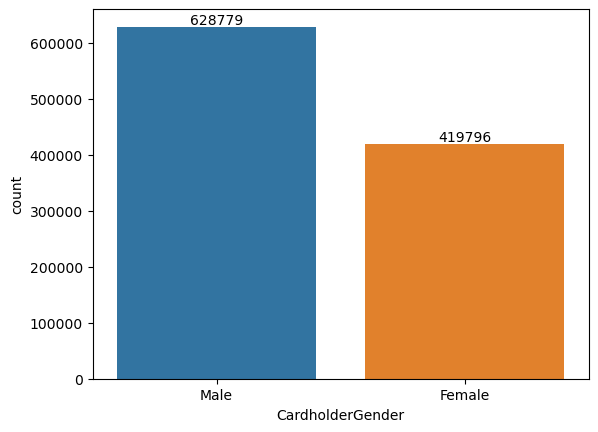

In [8]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x = 'CardholderGender',data = p1)

for bars in ax.containers:
    ax.bar_label(bars)

In [9]:
#Define A Outliers Form Dataset

def outliers(df, column):
    
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_fence = q1 - 1.5 * iqr
    higher_fence = q3 + 1.5 * iqr
    final_data = p1[(p1[column]>lower_fence) & (p1[column]<higher_fence)]
    df = final_data.copy()
    return lower_fence, higher_fence

In [10]:
outliers(p1,'CardholderAge')

(8.5, 60.5)

In [11]:
#Find The Outliers and Then loc It From CardholderAge

p1.loc[(p1['CardholderAge'] >= 60) | (p1['CardholderAge'] <= 18)].shape
new_p1 = p1.loc[(p1['CardholderAge'] <= 60) | (p1['CardholderAge'] >= 18)]
new_p1.loc[new_p1['CardholderAge']>60,'CardholderAge'] = 60
new_p1.loc[new_p1['CardholderAge']<18,'CardholderAge'] = 18
p1= new_p1.copy()
print('new data : ',len(new_p1))
print('old data : ',len(p1))
print(p1.shape)
print()

new data :  1048575
old data :  1048575
(1048575, 16)



In [11]:
# Save to Excel file
p1.to_excel('D:/Project 1/Payment.xlsx', index=False)

# Checking A Type Of Cards

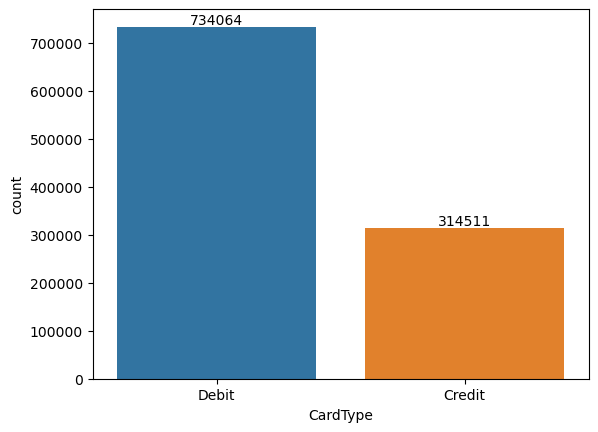

In [12]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x = 'CardType',data = p1)

for bars in ax.containers:
    ax.bar_label(bars)

# Only Focus On Debit Cards 🎴 

In [13]:
debit = p1[p1['CardType'] == 'Debit']
credit = p1[p1['CardType'] == 'Credit']

# Age

C:\Users\Saurav\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


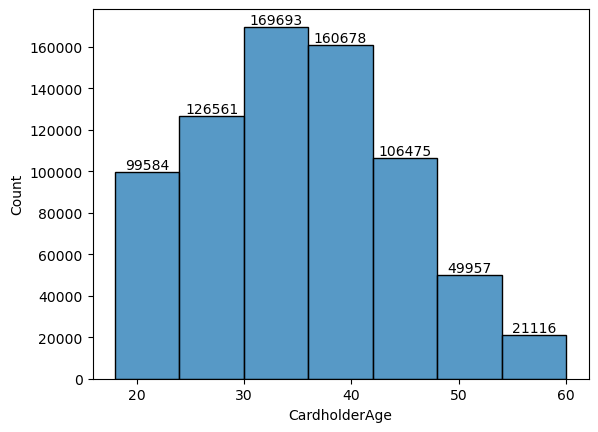

In [14]:
ax = sns.histplot(debit['CardholderAge'],bins=7)

for bars in ax.containers:
    ax.bar_label(bars)

# Country Code

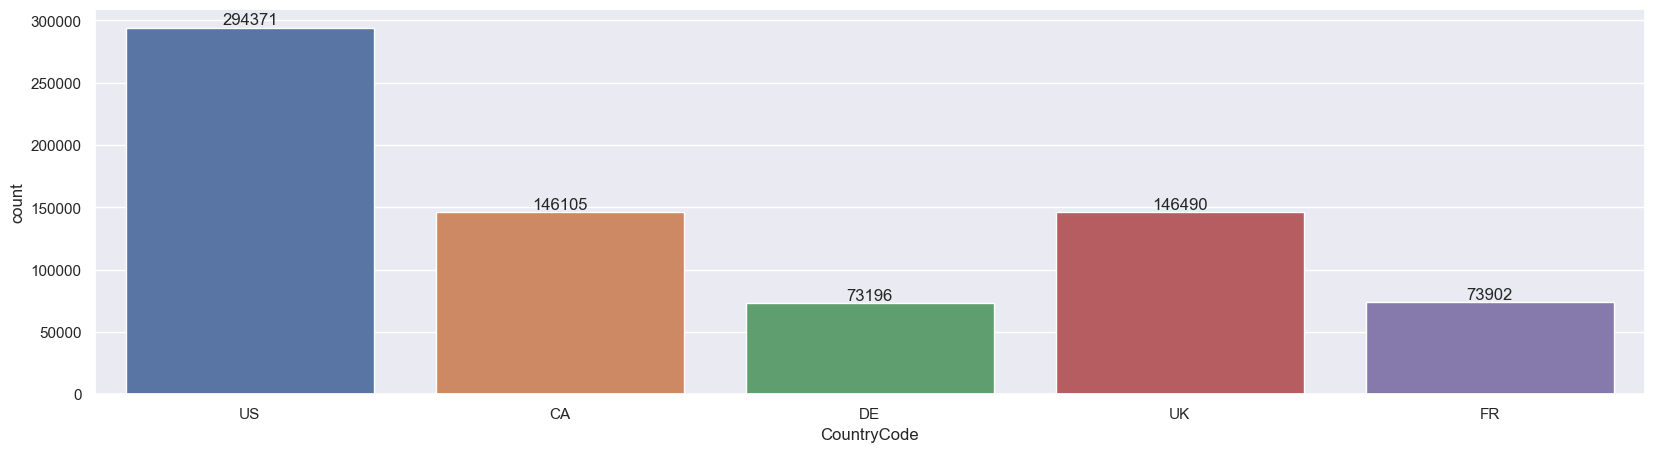

In [15]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = debit, x = 'CountryCode')

for bars in ax.containers:
    ax.bar_label(bars)

# Quarter Wise Results 

In [16]:
debit['TransactionDate'] = pd.to_datetime(debit['TransactionDate'], format='%d-%m-%Y')
debit['TransactionDate'] = debit['TransactionDate'].dt.quarter.astype(int)

C:\Users\Saurav\AppData\Local\Temp\ipykernel_18972\1483862464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  debit['TransactionDate'] = pd.to_datetime(debit['TransactionDate'], format='%d-%m-%Y')
C:\Users\Saurav\AppData\Local\Temp\ipykernel_18972\1483862464.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  debit['TransactionDate'] = debit['TransactionDate'].dt.quarter.astype(int)


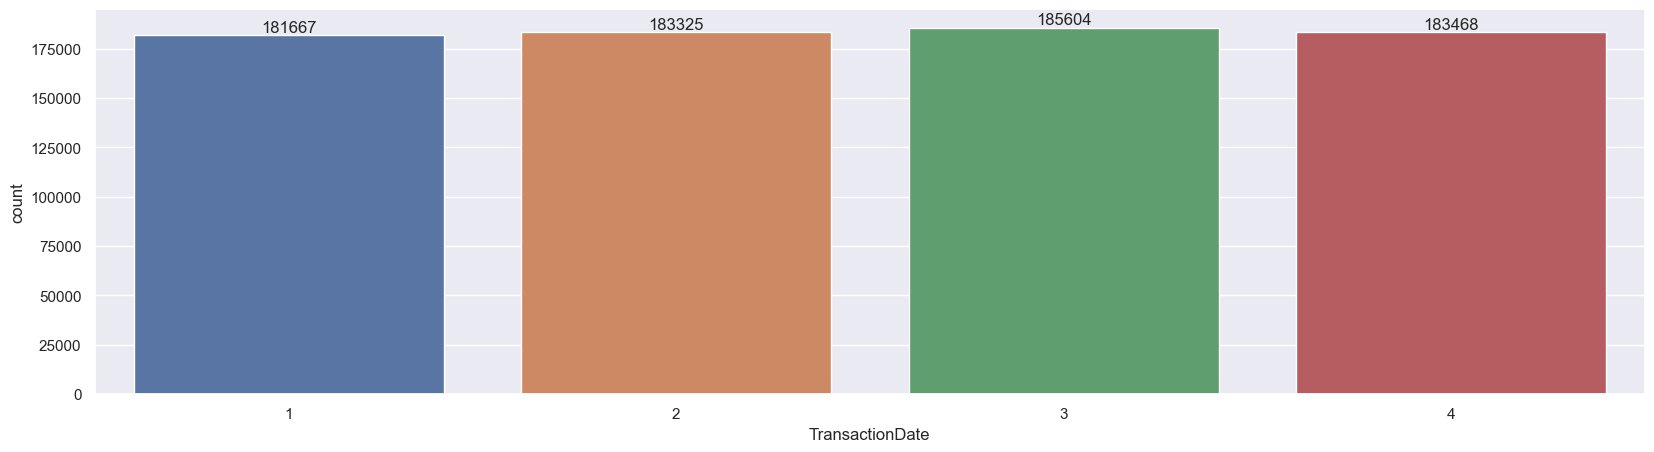

In [17]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = debit, x = 'TransactionDate')

for bars in ax.containers:
    ax.bar_label(bars)

# Transaction Response Code

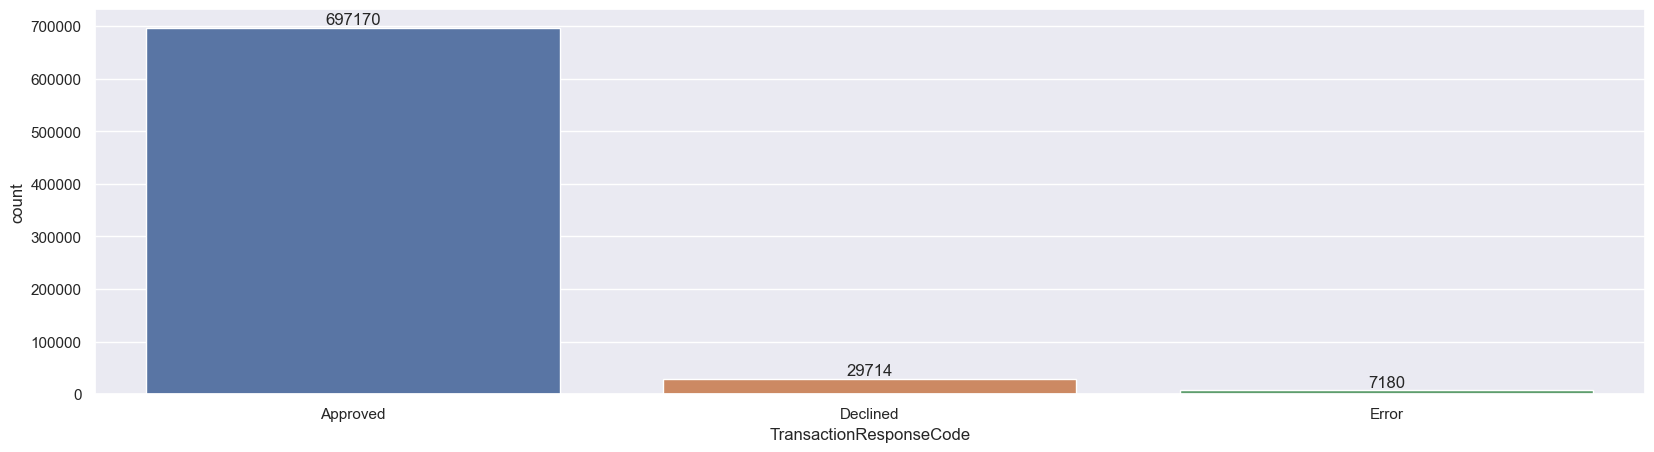

In [18]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = debit, x = 'TransactionResponseCode')

for bars in ax.containers:
    ax.bar_label(bars)

# Check Fraudulent Transaction

In [19]:
debit['FraudulentTransactionFlag'] = debit['FraudulentTransactionFlag'].replace(0,'No')
debit['FraudulentTransactionFlag'] = debit['FraudulentTransactionFlag'].replace(1,'Yes')

C:\Users\Saurav\AppData\Local\Temp\ipykernel_18972\554404321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  debit['FraudulentTransactionFlag'] = debit['FraudulentTransactionFlag'].replace(0,'No')
C:\Users\Saurav\AppData\Local\Temp\ipykernel_18972\554404321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  debit['FraudulentTransactionFlag'] = debit['FraudulentTransactionFlag'].replace(1,'Yes')


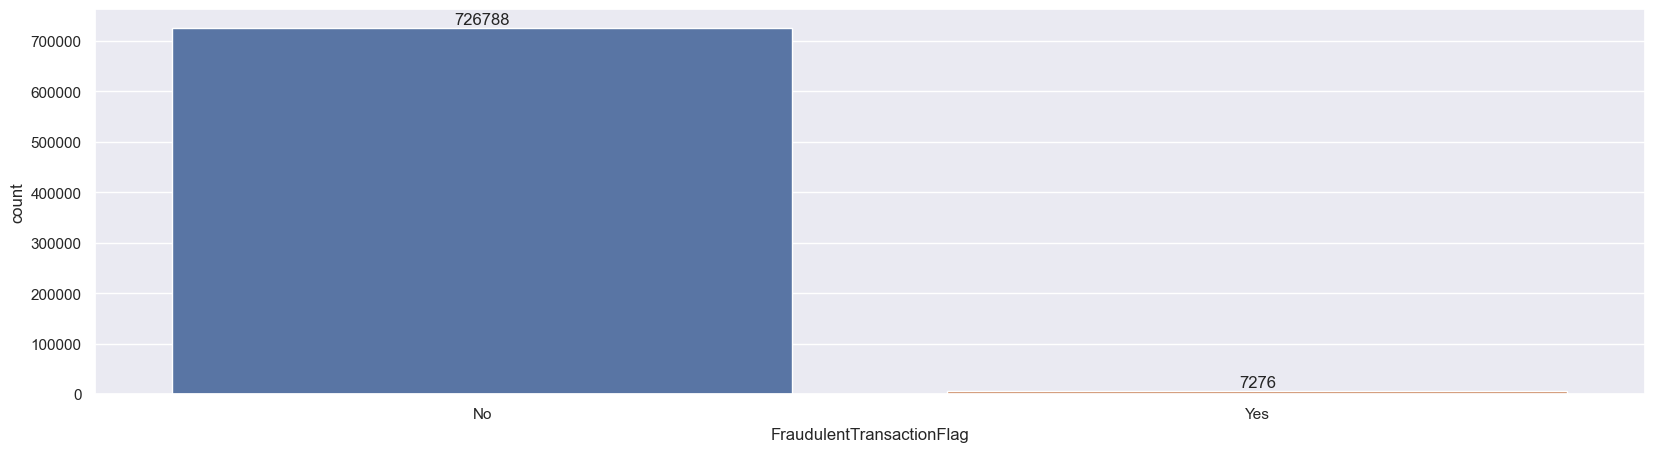

In [20]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = debit, x = 'FraudulentTransactionFlag')

for bars in ax.containers:
    ax.bar_label(bars)

# Transaction Currency 

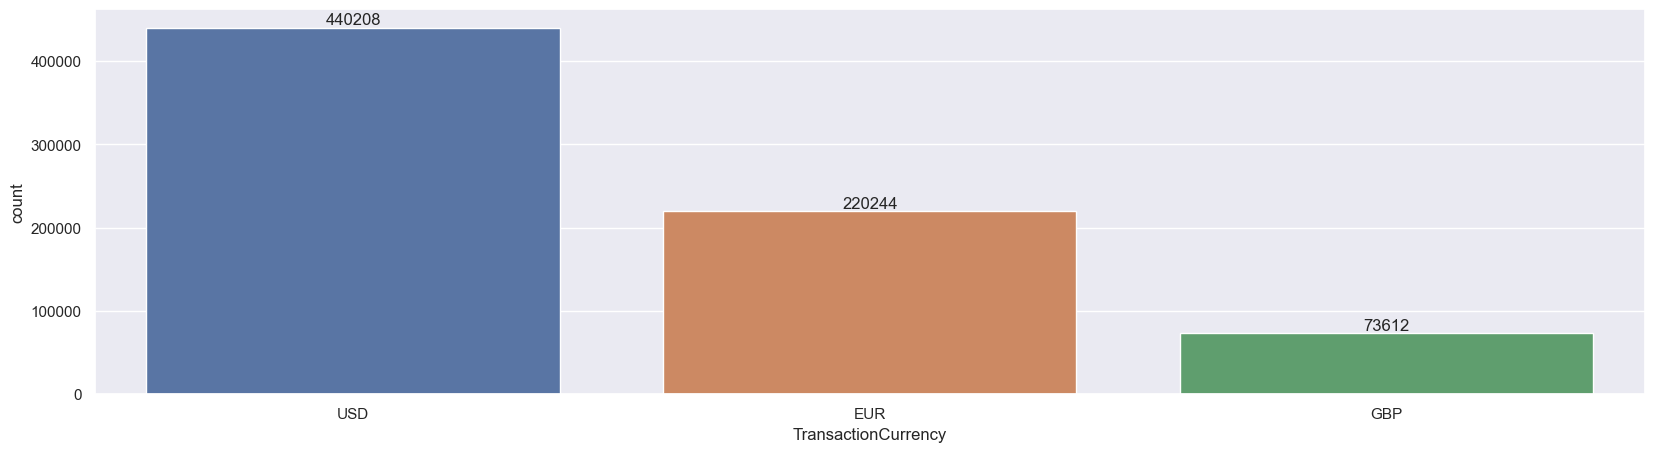

In [21]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = debit, x = 'TransactionCurrency')

for bars in ax.containers:
    ax.bar_label(bars)

# Merchant Category Wise Code

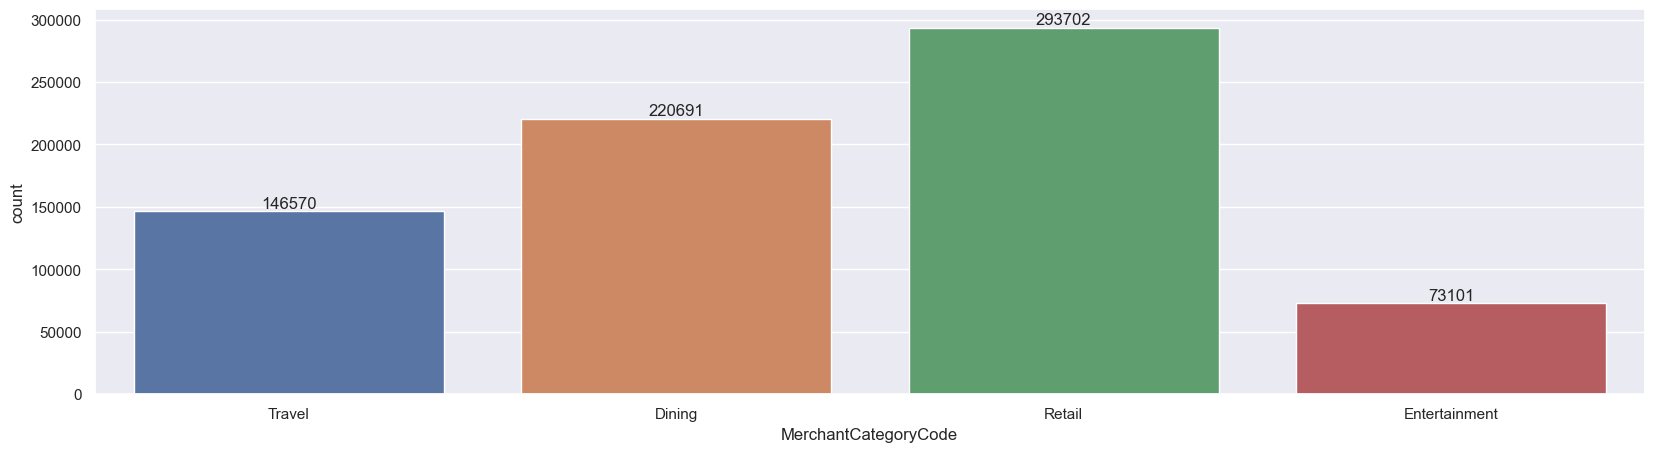

In [22]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = debit, x = 'MerchantCategoryCode')

for bars in ax.containers:
    ax.bar_label(bars)

# Transaction Types

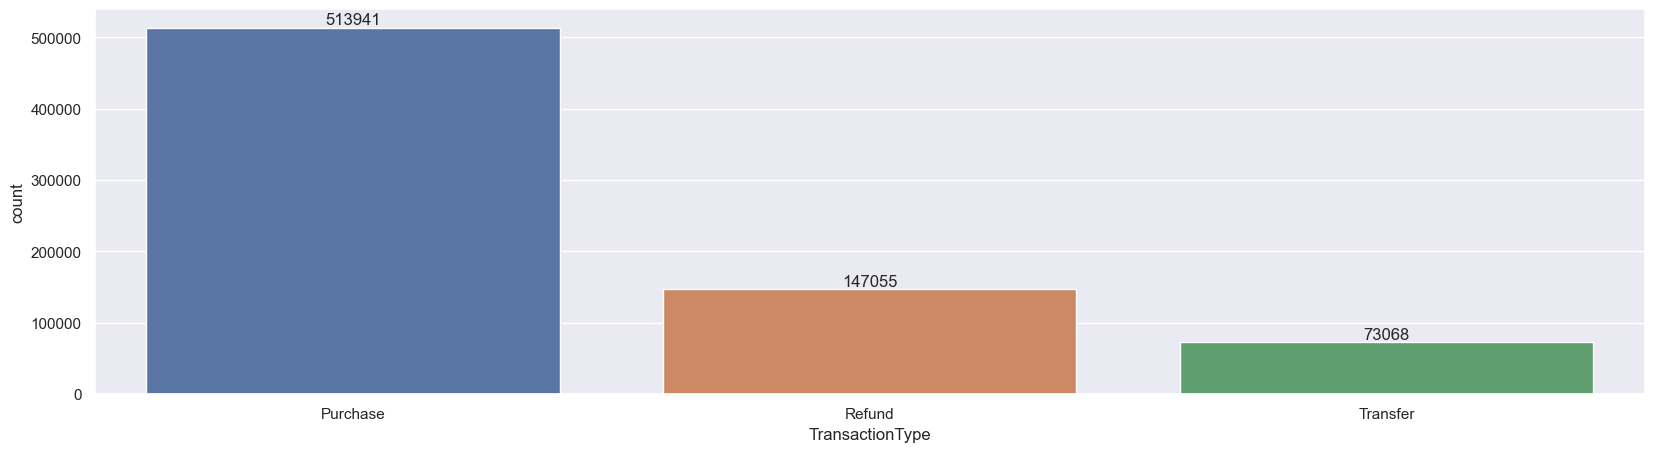

In [23]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = debit, x = 'TransactionType')

for bars in ax.containers:
    ax.bar_label(bars)

# Distribution Of Transaction Amounts

C:\Users\Saurav\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


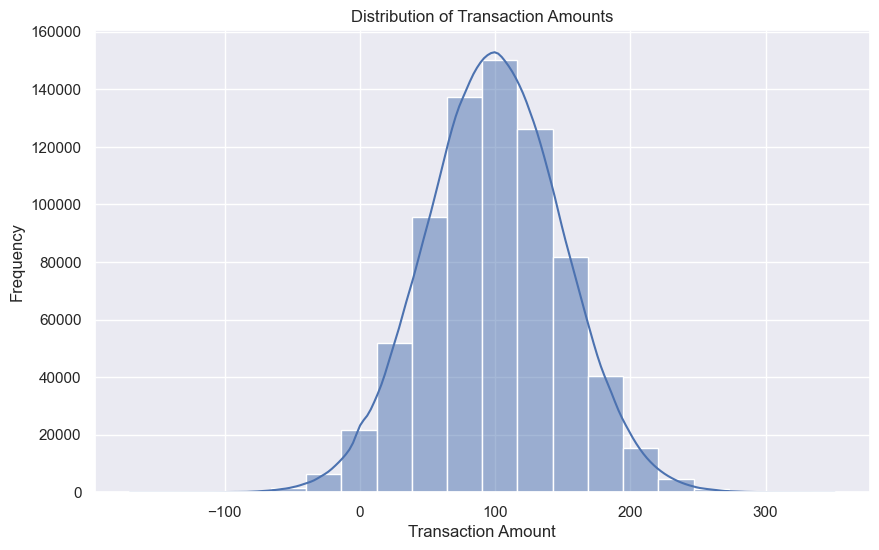

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(debit['TransactionAmount'], bins=20, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# Transaction Time

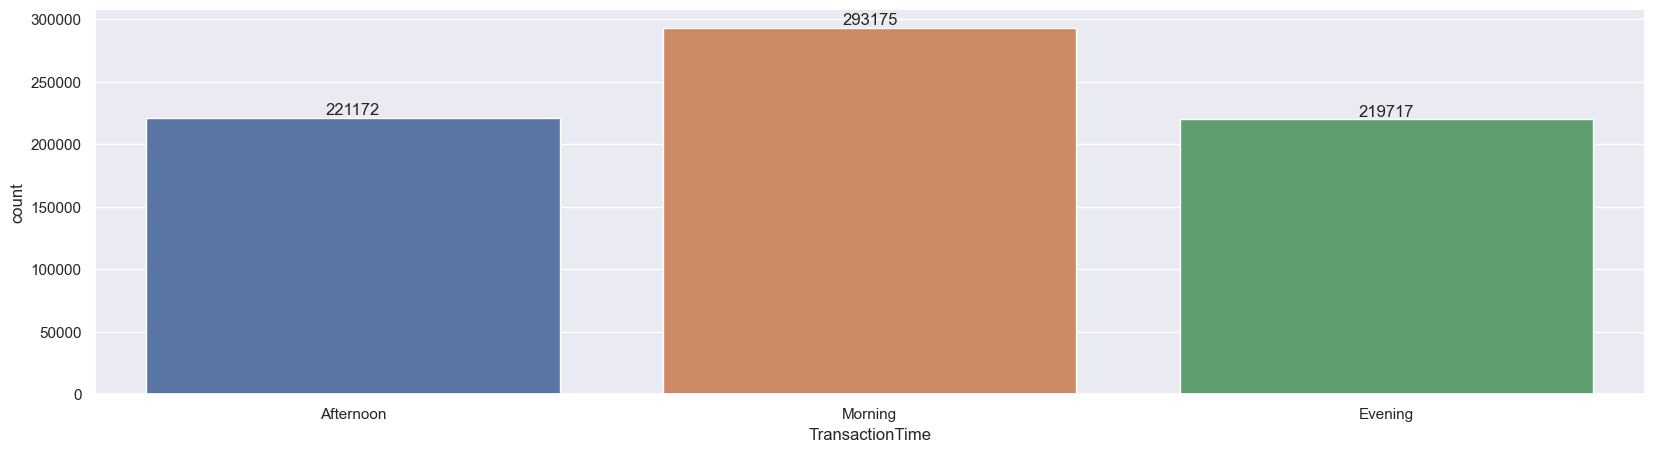

In [25]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = debit, x = 'TransactionTime')

for bars in ax.containers:
    ax.bar_label(bars)

# Transaction Channel

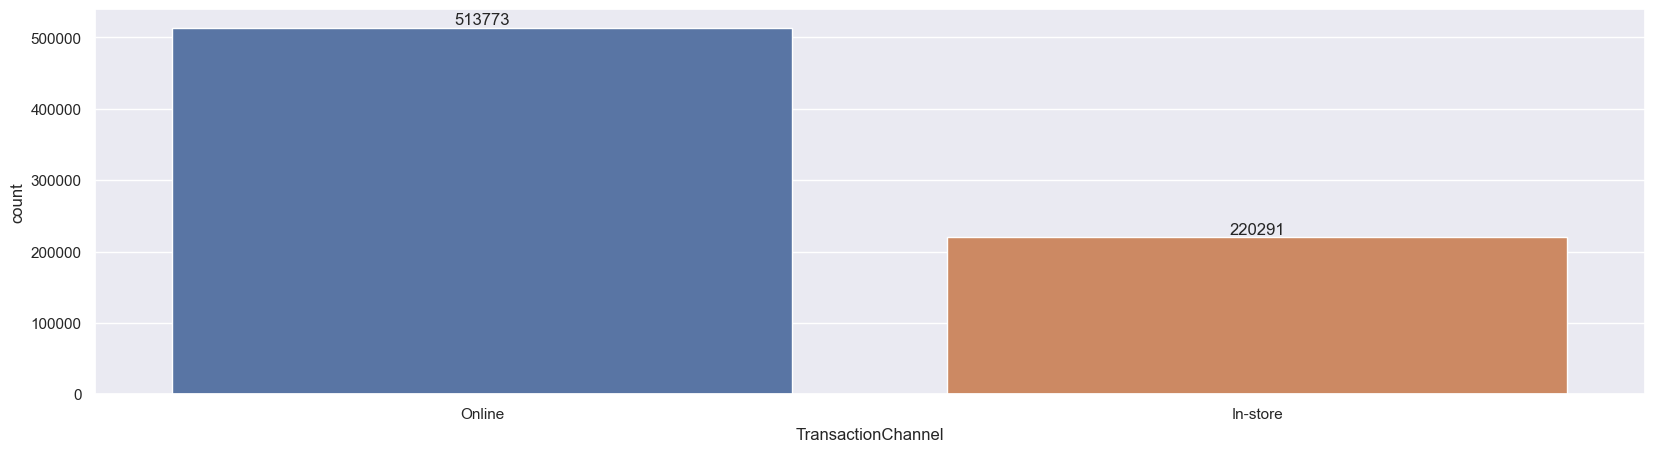

In [26]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = debit, x = 'TransactionChannel')

for bars in ax.containers:
    ax.bar_label(bars)

In [27]:
def Currency(debit):
    column_name = input("Enter column name (MerchantCategoryCode, CountryCode, TransactionType, TransactionTime: ")#.strip()
    print()
    print(f"Enter Your Column Name {column_name} Is : " , p1[column_name].unique())
    print()
    
    if column_name in p1.columns:
        value = input(f"Enter Your Value For {column_name}: ")
        # Filter the DataFrame based on the user input
        
        filtered_df = p1[(p1[column_name] == value)]
        
        if not filtered_df.empty:
            print(f"\nShowing information for column: {column_name}\n")
            print("\nTotal rows of the filtered column:\n", filtered_df[column_name].count())
            
    
    # Create a bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x='TransactionAmount', y='TransactionCurrency', data=filtered_df, ci=None)
    plt.title('Credit Cards by Work for Age')
    plt.xlabel('Number Of Transaction Amount')
    plt.ylabel('Category Code')
    plt.show()
    
    return filtered_df.shape

In [29]:
Currency(debit).

SyntaxError: invalid syntax (3034482082.py, line 1)

# Only Focus On Credit Card 🎴 

# Age

C:\Users\Saurav\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


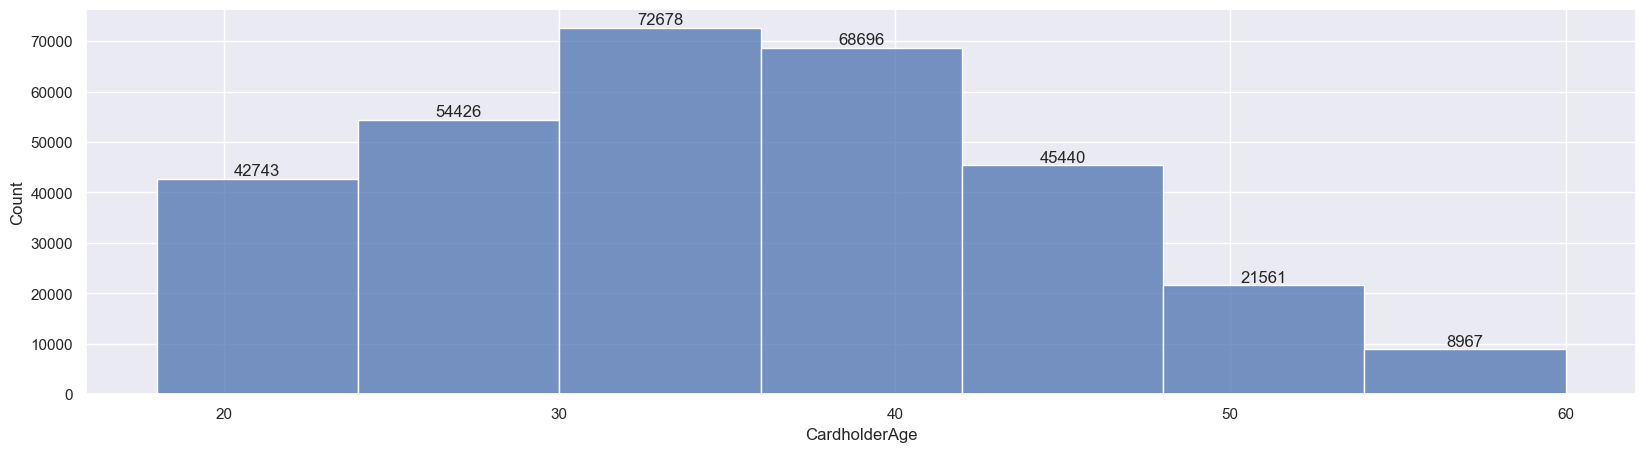

In [30]:

ax = sns.histplot(credit['CardholderAge'],bins=7)

for bars in ax.containers:
    ax.bar_label(bars)

# Distributed Country Wise

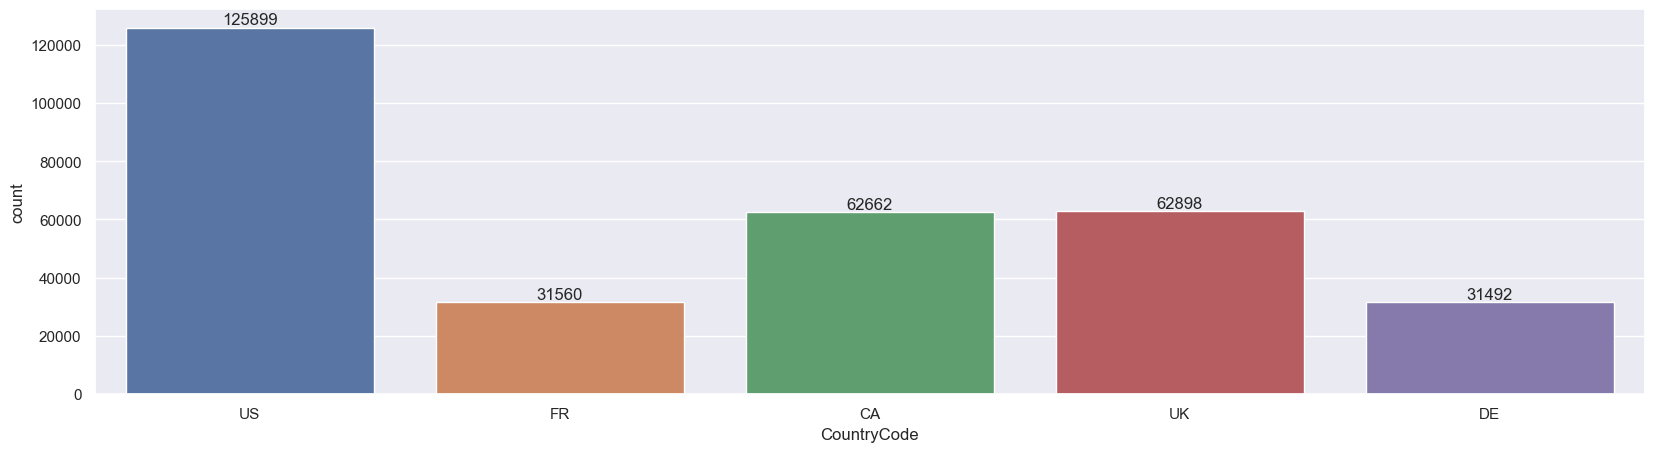

In [31]:

sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = credit, x = 'CountryCode')

for bars in ax.containers:
    ax.bar_label(bars)

# Distributed Transaction Quarter Wise


In [32]:
credit['TransactionDate'] = pd.to_datetime(credit['TransactionDate'], format='%d-%m-%Y')
credit['TransactionDate'] = credit['TransactionDate'].dt.quarter.astype(int)


C:\Users\Saurav\AppData\Local\Temp\ipykernel_18972\1433003103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit['TransactionDate'] = pd.to_datetime(credit['TransactionDate'], format='%d-%m-%Y')
C:\Users\Saurav\AppData\Local\Temp\ipykernel_18972\1433003103.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit['TransactionDate'] = credit['TransactionDate'].dt.quarter.astype(int)


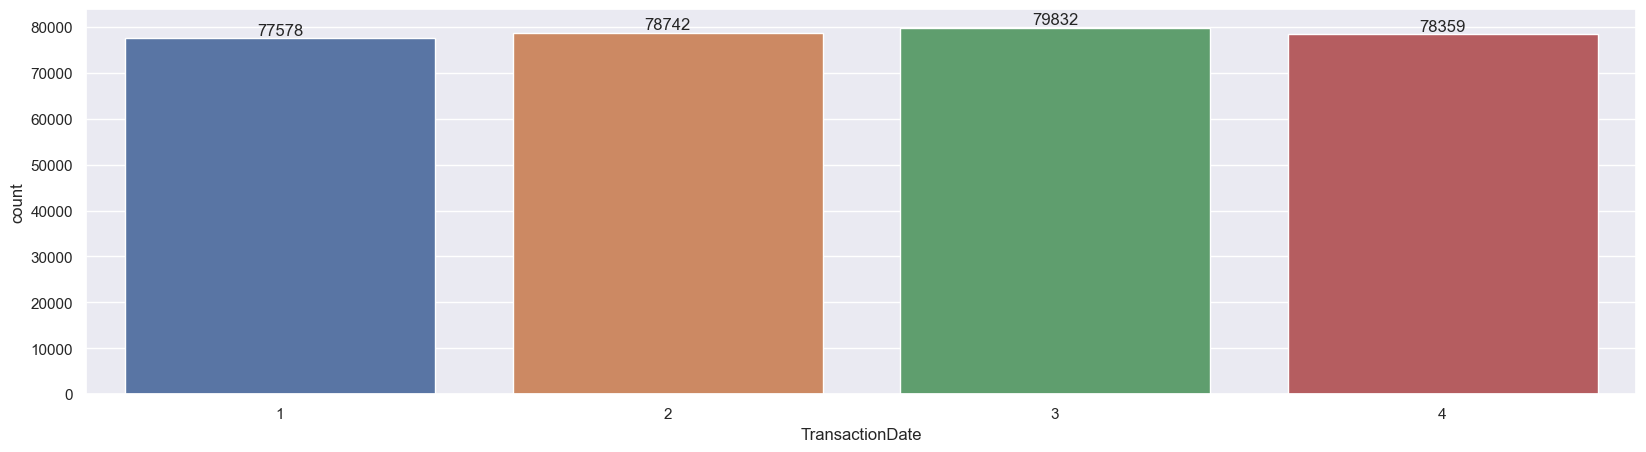

In [33]:

sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = credit, x = 'TransactionDate')

for bars in ax.containers:
    ax.bar_label(bars)


# Distribution Transaction Response Code

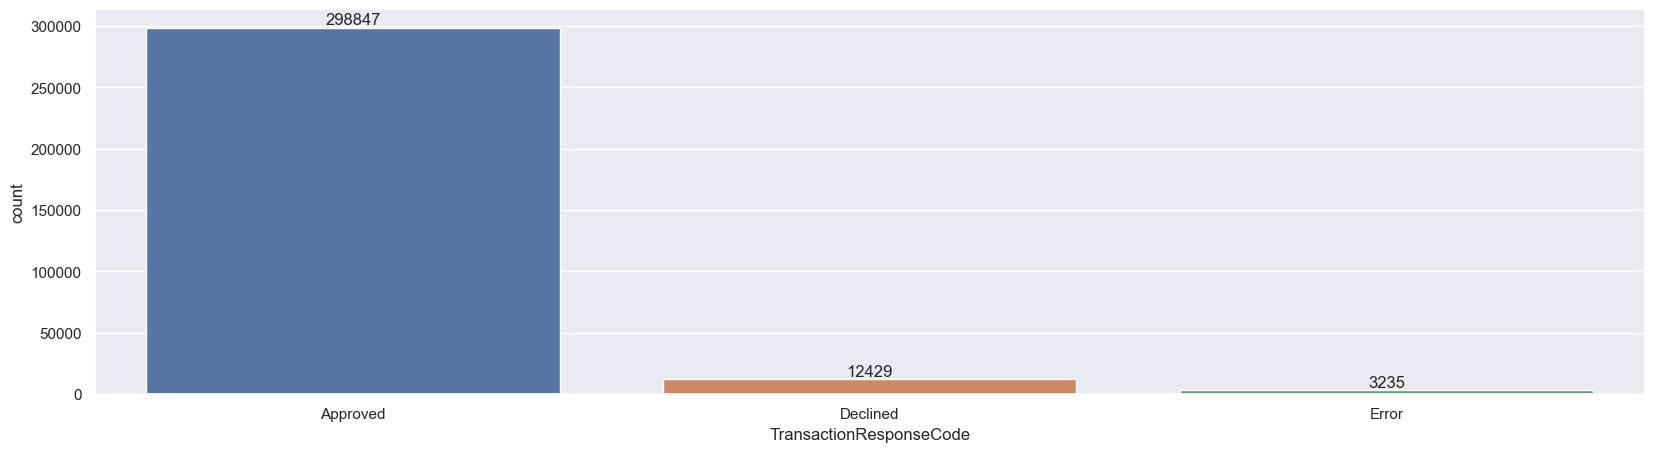

In [34]:

sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = credit, x = 'TransactionResponseCode')

for bars in ax.containers:
    ax.bar_label(bars)

# Check Fraudulent Transaction

In [35]:
credit['FraudulentTransactionFlag'] = credit['FraudulentTransactionFlag'].replace(0,'No')
credit['FraudulentTransactionFlag'] = credit['FraudulentTransactionFlag'].replace(1,'Yes')

C:\Users\Saurav\AppData\Local\Temp\ipykernel_18972\1764207016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit['FraudulentTransactionFlag'] = credit['FraudulentTransactionFlag'].replace(0,'No')
C:\Users\Saurav\AppData\Local\Temp\ipykernel_18972\1764207016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit['FraudulentTransactionFlag'] = credit['FraudulentTransactionFlag'].replace(1,'Yes')


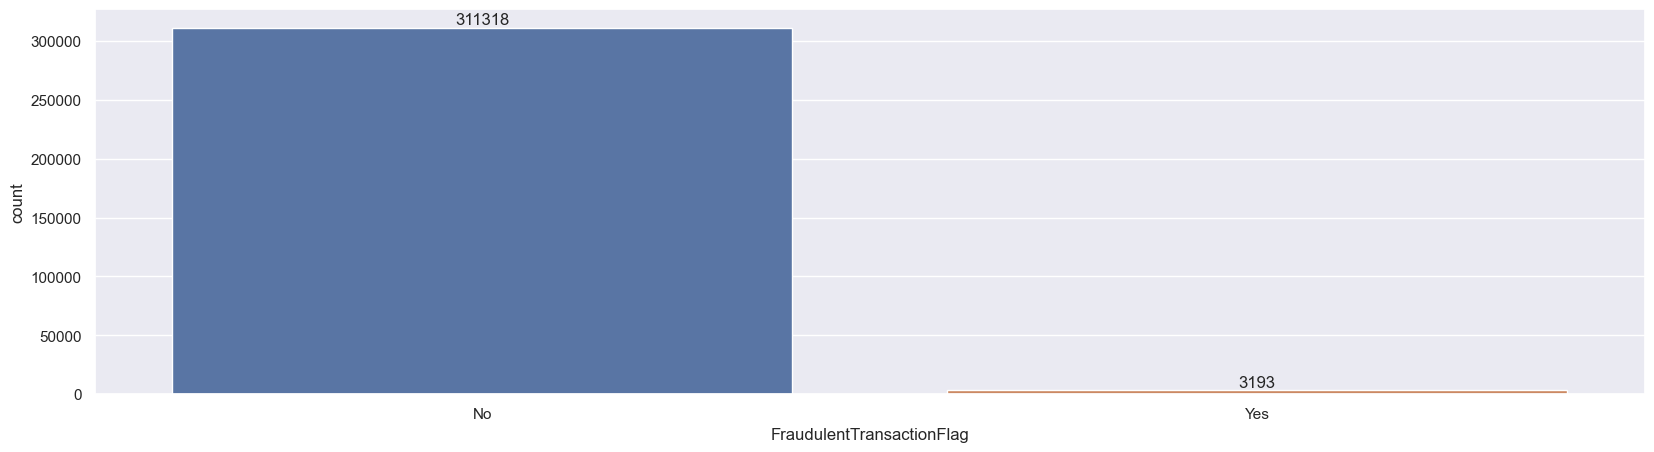

In [36]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = credit, x = 'FraudulentTransactionFlag')

for bars in ax.containers:
    ax.bar_label(bars)


# Check The Currency Wise Transaction

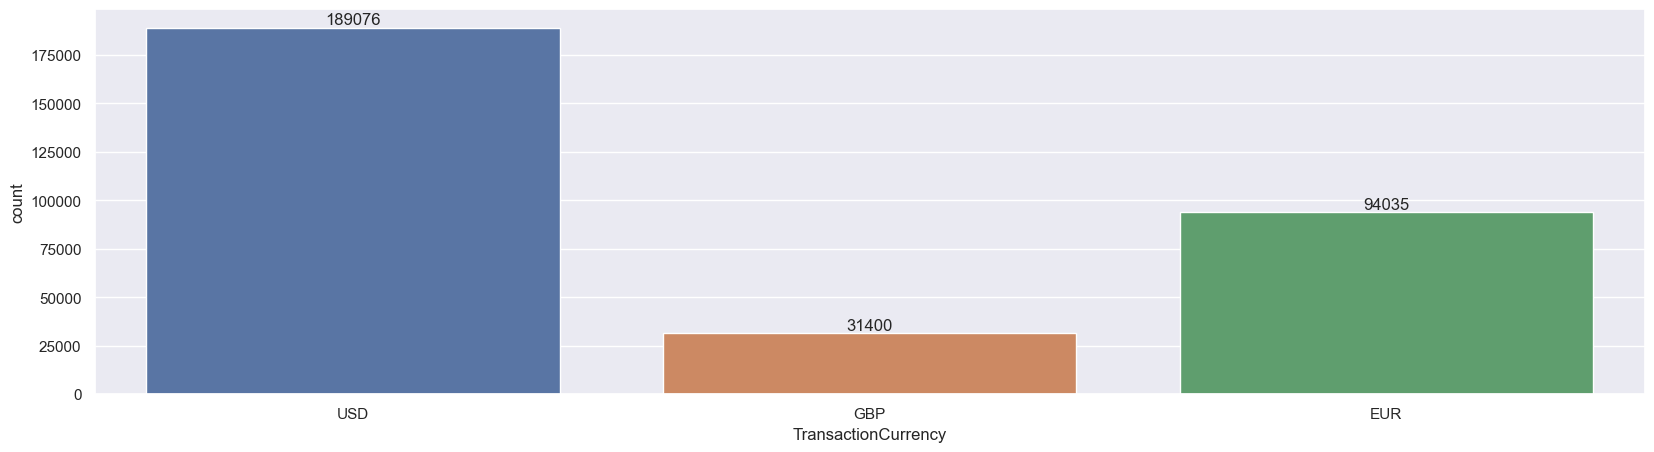

In [37]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = credit, x = 'TransactionCurrency')

for bars in ax.containers:
    ax.bar_label(bars)

# Merchant Category Wise Transitions 

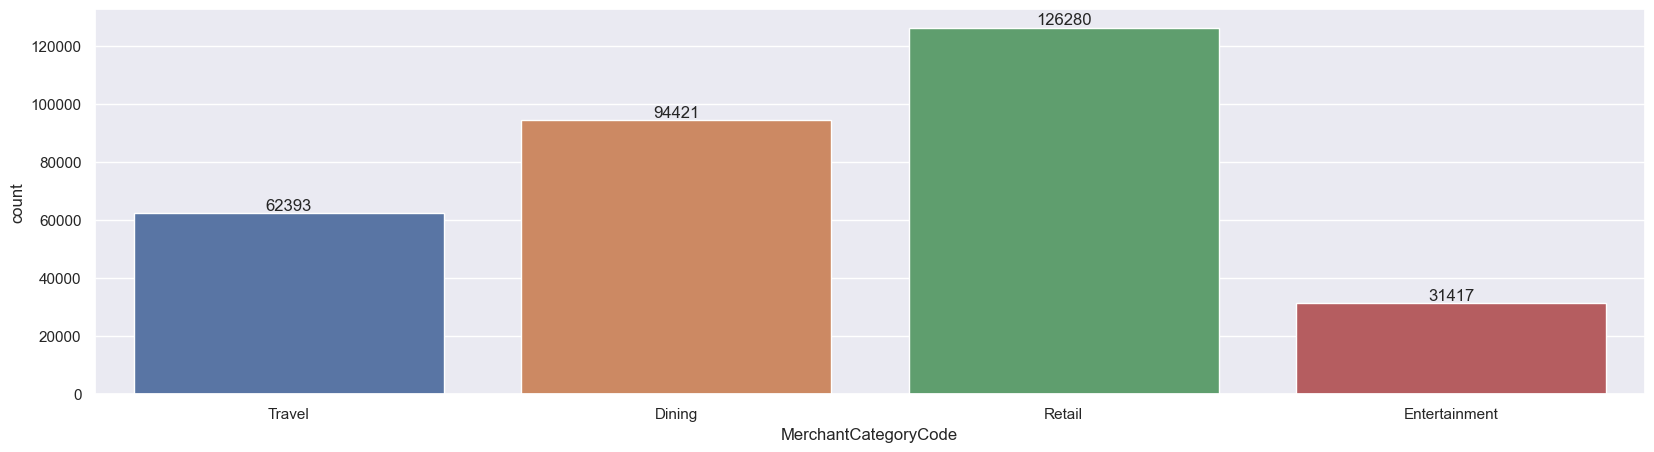

In [38]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = credit, x = 'MerchantCategoryCode')

for bars in ax.containers:
    ax.bar_label(bars)

# Check The Transaction Type

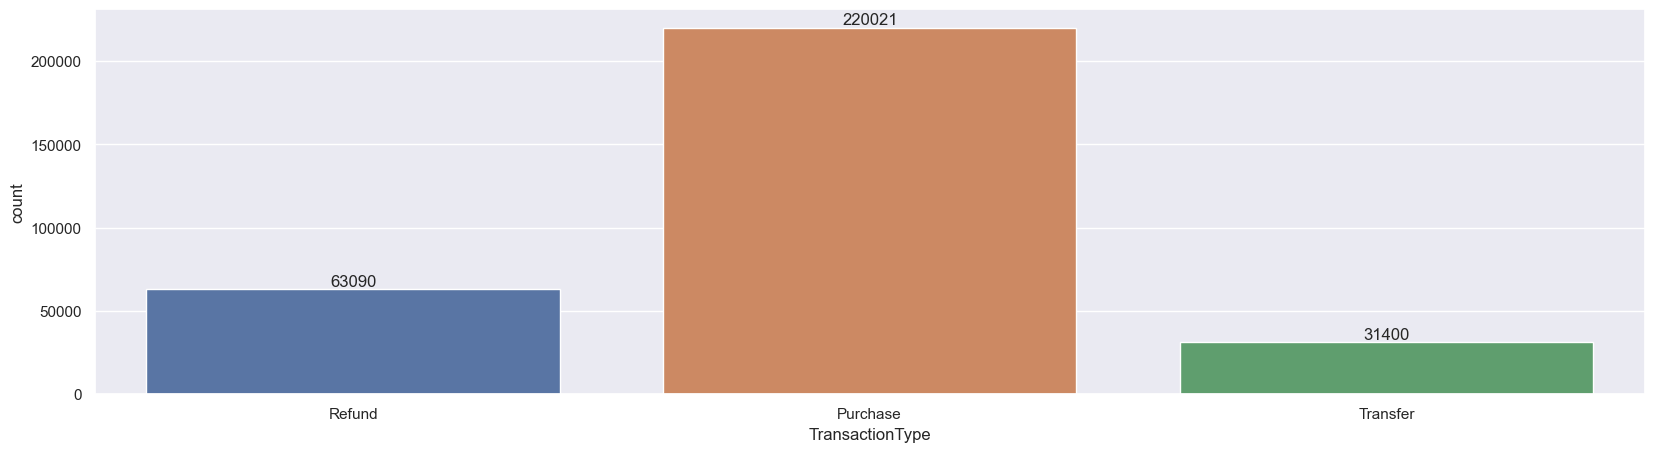

In [39]:

sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = credit, x = 'TransactionType')

for bars in ax.containers:
    ax.bar_label(bars)

# Distribution Of Transaction Amounts

C:\Users\Saurav\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


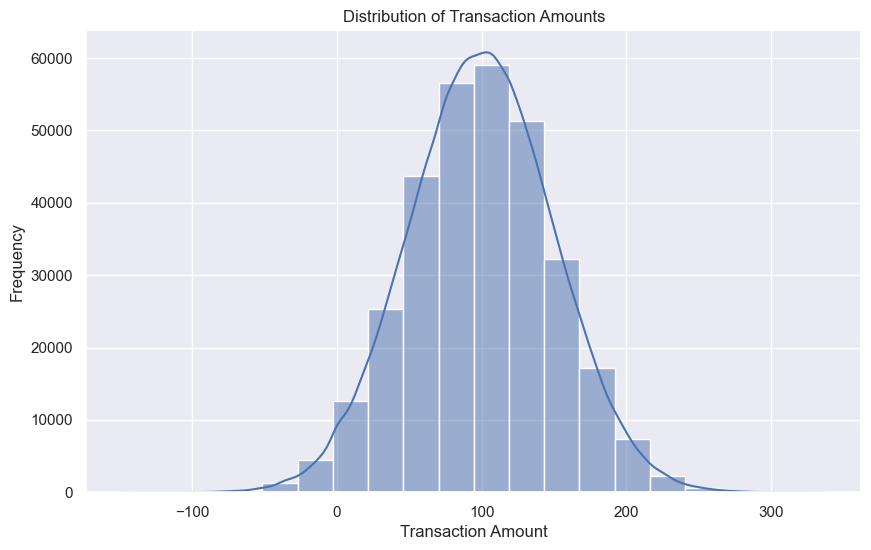

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(credit['TransactionAmount'], bins=20, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# Check Transactions Wise Time

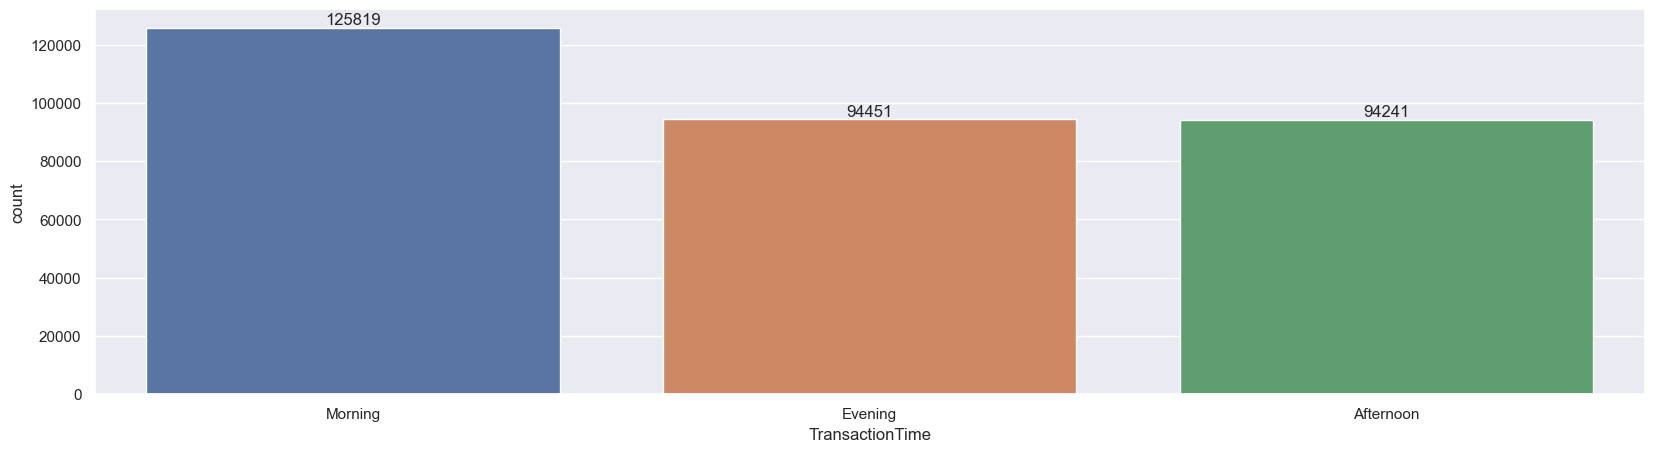

In [41]:

sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = credit, x = 'TransactionTime')

for bars in ax.containers:
    ax.bar_label(bars)


# Check The Transaction Wise Mode

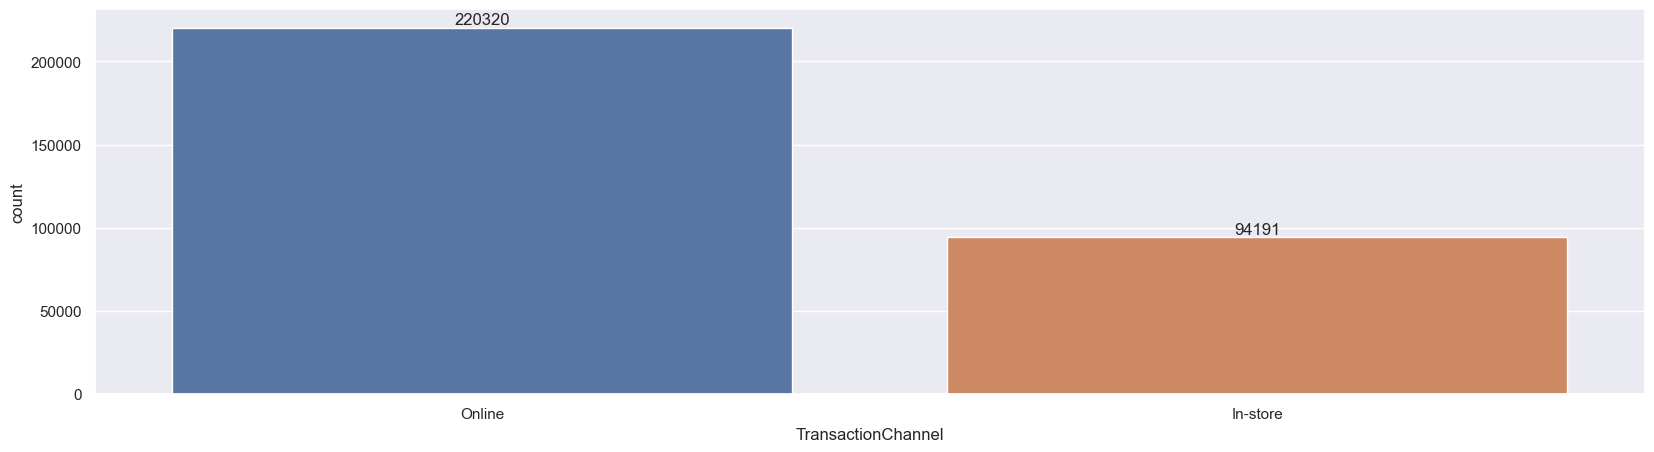

In [42]:

sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = credit, x = 'TransactionChannel')

for bars in ax.containers:
    ax.bar_label(bars)

# Conclusions

* The majority of debit card and credit cards users are in the age group of 30 to 42 means 32 % belong to this group.
* 41 % people are in US use a debit cards or credit cards .
* Debit card transactions are approved 96.07 % and decliled 2.87 % and errored 1.06 %.
* Credit card transactions are approved 94.46 % and declined 4.44 % and errored 1.10 %.
* Fraud transactions in debit cards are 7276 means 0.74 % and credit cards are 3193 means 1.06.
* Looking at the currencies in debit cards , USD is used by 65 % and EUR by 26 % and GBP by 9 %.
* If you look at the debit cards and credir cards ,it is used in the morning in the comparison between afternoon and evening.
* If we look at the transactions channel in debit cards 69 % are used online and 31 % are used in-store ya physical.
